In [2]:
import sklearn           as sk
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [3]:
print(sk.__version__)
print(np.__version__)

0.22.2.post1
1.19.5


In [64]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/jawad3838/Titanic-Survival-Prediction-Using-R/master/train.csv")

In [65]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [66]:
print(titanic_df.shape)

(891, 12)


In [67]:
## droping un necessary column
df = titanic_df.drop(["PassengerId","Name","Ticket","Cabin"],'columns')

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [69]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [70]:
df = df.dropna()

In [71]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [72]:
print(df.shape)

(712, 8)


In [73]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [74]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


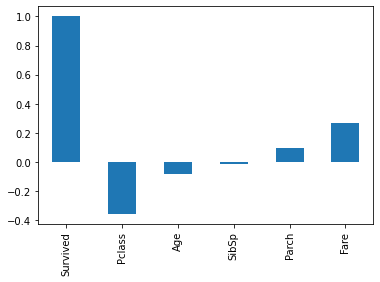

In [75]:
## most relation colums with the survued
df.corr()["Survived"].plot(kind="bar")

Text(0, 0.5, 'Survived')

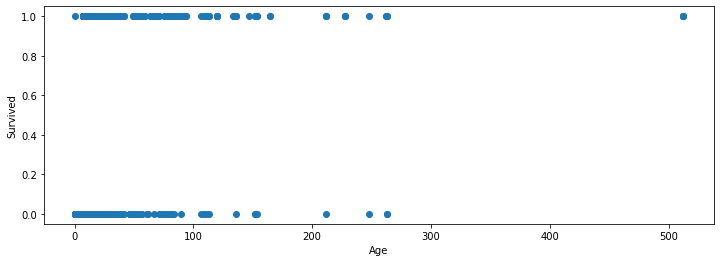

In [76]:
## plotting relation 
fig,ax = plt.subplots(figsize=(12,4))
#plt.scatter(df['Age'],df['Survived'])
plt.scatter(df['Fare'],df['Survived'])
plt.xlabel("Age")
plt.ylabel("Survived")

In [77]:
## making crosstab analysis
## it is helpful in binary classification
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [78]:
## making crosstab analysis
## it is helpful in binary classification
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [79]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


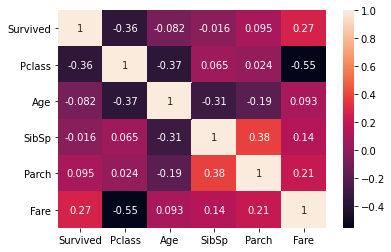

In [80]:
sns.heatmap(df.corr(),annot=True)

In [81]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()

In [82]:
df['Sex'] = label_encoding.fit_transform(df['Sex'])

In [83]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [84]:
## we can encode the Embarked like That
#df['Embarked'] = label_encoding.fit_transform(df['Embarked'])
#df.head()

In [86]:
## but we will do the one hot encoding
df = pd.get_dummies(df,columns=['Embarked'])

In [87]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [88]:
## shuffle data with df.sample
df = df.sample(frac=1).reset_index(drop=True)

In [89]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,2,0,29.0,1,0,26.0000,0,0,1
1,1,1,0,30.0,0,0,106.4250,1,0,0
2,0,2,1,24.0,2,0,73.5000,0,0,1
3,0,3,0,9.0,1,1,15.2458,1,0,0
4,1,1,1,23.0,0,1,63.3583,1,0,0
5,1,1,1,35.0,0,0,26.2875,0,0,1
6,1,1,0,22.0,0,1,55.0000,0,0,1
7,1,1,0,52.0,1,1,93.5000,0,0,1
8,1,2,0,48.0,1,2,65.0000,0,0,1
9,1,1,0,24.0,3,2,263.0000,0,0,1


In [90]:
df.shape

(712, 10)

In [108]:
from sklearn.model_selection import train_test_split
X = df.drop("Survived",axis=1)
y = df['Survived']

In [109]:
print(X.head(2))
print(y.head(2))

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  Embarked_S
0       2    0  29.0      1      0   26.000           0           0           1
1       1    0  30.0      0      0  106.425           1           0           0
0    1
1    1
Name: Survived, dtype: int64


In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [111]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(534, 9)
(178, 9)
(534,)
(178,)


In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model = LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train,y_train)

In [114]:
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [115]:
y_pred = model.predict(x_test)

In [116]:
print(y_pred)

[1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1]


In [119]:
pred_result = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [120]:
pred_result

,y_test,y_pred
8,1,1
360,1,0
434,0,0
88,0,1
128,0,0
...,...,...
129,1,0
565,1,1
531,1,0
396,0,0


In [121]:
## making another crosstab analysis
df_cross =pd.crosstab(pred_result.y_pred,pred_result.y_test)

In [122]:
df_cross

y_test,0,1
y_pred,,
0,88,25
1,20,45


In [123]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [124]:
acc    = accuracy_score(y_test,y_pred)
prec   = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

In [126]:
print("ACCURACY  SCORE Is {}".format(acc))
print("PRECISION SCORE Is {}".format(prec))
print("RECALL SCORE IS    {}".format(recall))

ACCURACY  SCORE Is 0.7471910112359551
PRECISION SCORE Is 0.6923076923076923
RECALL SCORE IS    0.6428571428571429


In [128]:
## confusion martics with crosstab
df_cross

y_test,0,1
y_pred,,
0,88,25
1,20,45


In [129]:
## find 
#1) True Positive
#2) True Negative
#3) False Positive
#4) False Negative

In [130]:
TP = df_cross[1][1]
TN = df_cross[0][0]
FP = df_cross[0][1]
FN = df_cross[1][0]

In [131]:
accuracy_score_manual = (TP+TN)/(TP+TN+FP+FN)

In [132]:
print(accuracy_score_manual)

0.7471910112359551


In [133]:
precision_manual = TP/(TP+FP)

In [134]:
print(precision_manual)

0.6923076923076923


In [135]:
recall_manuall = TP/(TP+FN)

In [136]:
print(recall_manuall)

0.6428571428571429


In [137]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import  LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [138]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,2,0,29.0,1,0,26.0000,0,0,1
1,1,1,0,30.0,0,0,106.4250,1,0,0
2,0,2,1,24.0,2,0,73.5000,0,0,1
3,0,3,0,9.0,1,1,15.2458,1,0,0
4,1,1,1,23.0,0,1,63.3583,1,0,0


In [144]:
FEATURES = list(df.columns[1:])

In [145]:
print(FEATURES)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [146]:
result_dict = {}

In [147]:
def summarize_classification(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred,normalize=True) ## This will return accuracy in a fraction when normalize=True
  num_acc = accuracy_score(y_test,y_pred,normalize=False)  ## This will return number of accurately predicted value(total value that are accurately predicted)
  prec = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  return {'accuracy':acc,'precision':prec,'recall':recall,'accuracy_count':num_acc}


In [155]:
def build_model(classifier_fn,name_of_y_col,names_of_x_cols,dataset,test_frac =0.2):
  X = dataset[names_of_x_cols] ## provide a list
  Y = dataset[name_of_y_col]
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_frac)
  model = classifier_fn(x_train,y_train)
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)
  train_summary = summarize_classification(y_train,y_pred_train)
  test_summary = summarize_classification(y_test,y_pred)
  pred_results = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
  model_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)
  return {'training_summary':train_summary,'test_summary':test_summary,'confusion_matrix':model_crosstab}
  


In [156]:
## working with the logistic function again
def logistic_fn(x_train,y_train):
  model = LogisticRegression(solver='liblinear')
  model.fit(x_train,y_train)
  return model


In [157]:
result_dict['survived-logistic'] = build_model(logistic_fn,'Survived',FEATURES,df)

In [165]:
print(result_dict['survived-logistic']['training_summary'])
print(result_dict['survived-logistic']['test_summary'])

{'accuracy': 0.8031634446397188, 'precision': 0.7860696517412935, 'recall': 0.6960352422907489, 'accuracy_count': 457}
{'accuracy': 0.7552447552447552, 'precision': 0.75, 'recall': 0.639344262295082, 'accuracy_count': 108}


In [166]:
# make an axis where if you project the data
# all the relation is kept
# different category projection is far from each other on the axis
def Linear_discriminant_fn(x_train,y_train):
  model = LinearDiscriminantAnalysis().fit(x_train,y_train)
  return model

In [167]:
result_dict['survived-linear_discreminate_analysis'] = build_model(Linear_discriminant_fn,'Survived',FEATURES,df)

In [168]:
print(result_dict['survived-linear_discreminate_analysis']['training_summary'])
print(result_dict['survived-linear_discreminate_analysis']['test_summary'])

{'accuracy': 0.8031634446397188, 'precision': 0.7815533980582524, 'recall': 0.706140350877193, 'accuracy_count': 457}
{'accuracy': 0.7552447552447552, 'precision': 0.7192982456140351, 'recall': 0.6833333333333333, 'accuracy_count': 108}


In [169]:
def Quadratic_discriminant_fn(x_train,y_train):
  model = QuadraticDiscriminantAnalysis().fit(x_train,y_train)
  return model

In [175]:
## we intensonaly remove i column from 1 hot encoded columnturn to dummy encoded .you will do that when you get warning 
## for covarient
result_dict['survived-Quadratic_discreminate_analysis'] = build_model(Quadratic_discriminant_fn,'Survived',FEATURES[:-1],df)

In [176]:
print(result_dict['survived-Quadratic_discreminate_analysis']['training_summary'])
print(result_dict['survived-Quadratic_discreminate_analysis']['test_summary'])

{'accuracy': 0.7961335676625659, 'precision': 0.7647058823529411, 'recall': 0.6964285714285714, 'accuracy_count': 453}
{'accuracy': 0.8111888111888111, 'precision': 0.8627450980392157, 'recall': 0.6875, 'accuracy_count': 116}


In [185]:
def sgd_fn(x_train,y_train):
  model = SGDClassifier(max_iter=100).fit(x_train,y_train)
  return model

In [186]:
result_dict['survived-sgd'] = build_model(sgd_fn,'Survived',FEATURES,df)

In [187]:
result_dict['survived-sgd']['training_summary']
result_dict['survived-sgd']['test_summary']

{'accuracy': 0.7272727272727273,
 'accuracy_count': 104,
 'precision': 0.9032258064516129,
 'recall': 0.4375}

In [194]:
def svc_fn(x_train,y_train):
  model = LinearSVC(C=1.0,max_iter=100000).fit(x_train,y_train)
  return model

In [195]:
result_dict['survived-svc'] = build_model(svc_fn,'Survived',FEATURES,df)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [196]:
result_dict['survived-svc']['training_summary']
result_dict['survived-svc']['test_summary']

{'accuracy': 0.7902097902097902,
 'accuracy_count': 113,
 'precision': 0.7288135593220338,
 'recall': 0.7543859649122807}

In [198]:
## KNN based on radius
## element within radius circle is in the same category
def radius_neighbors_fn(x_train,y_train,radius=40.0):
  model = RadiusNeighborsClassifier(radius=radius).fit(x_train,y_train)
  return model

In [199]:
result_dict['survived-knn'] = build_model(radius_neighbors_fn,'Survived',FEATURES,df)

In [201]:
print(result_dict['survived-knn']['training_summary'])
print(result_dict['survived-knn']['test_summary'])

{'accuracy': 0.6660808435852372, 'precision': 0.7052631578947368, 'recall': 0.2925764192139738, 'accuracy_count': 379}
{'accuracy': 0.6853146853146853, 'precision': 0.7692307692307693, 'recall': 0.3389830508474576, 'accuracy_count': 98}


In [202]:
def decision_tree_fn(x_train,y_train):
  model = DecisionTreeClassifier().fit(x_train,y_train)
  return model

In [203]:
result_dict['survived-decision_tree'] = build_model(decision_tree_fn,'Survived',FEATURES,df)

In [204]:
print(result_dict['survived-decision_tree']['training_summary'])
print(result_dict['survived-decision_tree']['test_summary'])

{'accuracy': 0.9876977152899824, 'precision': 1.0, 'recall': 0.970954356846473, 'accuracy_count': 562}
{'accuracy': 0.7412587412587412, 'precision': 0.5892857142857143, 'recall': 0.7021276595744681, 'accuracy_count': 106}


In [205]:
def nb_fn(x_train,y_train):
  model = GaussianNB().fit(x_train,y_train)
  return model

In [206]:
result_dict['survived-naieve_base'] = build_model(nb_fn,'Survived',FEATURES,df)

In [207]:
print(result_dict['survived-naieve_base']['training_summary'])
print(result_dict['survived-naieve_base']['test_summary'])

{'accuracy': 0.7680140597539543, 'precision': 0.719626168224299, 'recall': 0.6814159292035398, 'accuracy_count': 437}
{'accuracy': 0.7342657342657343, 'precision': 0.7222222222222222, 'recall': 0.6290322580645161, 'accuracy_count': 105}
